In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#地域別にモデル組むか、地域を一つの変数とするかは悩む
#ラグの気温や移動平均とかも含めて特徴量にするとよいかも
#

In [149]:
train_df = pd.read_csv("input/train.csv", encoding = "cp932")
test_df = pd.read_csv("input/test.csv", encoding = "cp932")
submission_df = pd.read_csv("input/sample_submission.csv", encoding = "cp932")

In [150]:
train_df

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo
0,2017020101,0.0,0.0,0.0,-1.0,4.1,2.9,16,1,2,2.7,2.5,1.3,0.0,8.0,0.0
1,2017020102,0.0,0.0,0.0,-1.1,4.2,2.6,1,1,1,3.3,1.5,0.9,0.0,24.0,4.0
2,2017020103,0.0,0.0,0.0,-0.7,4.2,2.4,1,15,16,4.0,1.7,0.6,4.0,32.0,12.0
3,2017020104,0.0,0.0,0.0,-1.1,4.4,1.8,1,15,1,4.1,3.1,1.4,0.0,12.0,0.0
4,2017020105,0.0,0.0,0.0,-1.2,4.1,1.5,2,14,14,3.7,3.4,0.9,0.0,32.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,2020033120,0.0,0.0,0,10.0,11.5,9.4,16,2,16,2.4,2.6,0.7,118.0,0.0,12.0
12164,2020033121,0.0,0.0,0,10.1,11.3,8.9,15,15,14,2.4,1.7,1.3,73.0,4.0,4.0
12165,2020033122,0.0,0.0,0,9.8,11.3,8.8,3,15,15,1.2,2.7,0.9,8.0,0.0,20.0
12166,2020033123,0.5,0.0,0,9.7,10.9,8.9,16,16,1,0.5,2.9,0.6,24.0,4.0,0.0


In [151]:
train_df.dtypes

datetime                      int64
precipitation_utsunomiya    float64
precipitation_chiba         float64
precipitation_tokyo          object
temperature_utsunomiya      float64
temperature_chiba            object
temperature_tokyo            object
winddirection_utsunomiya      int64
winddirection_chiba          object
winddirection_tokyo          object
windspeed_utsunomiya        float64
windspeed_chiba              object
windspeed_tokyo              object
pollen_utsunomiya           float64
pollen_chiba                float64
pollen_tokyo                float64
dtype: object

In [152]:
train_df = train_df[~train_df["temperature_tokyo"].astype(str).str.contains("谺")]
train_df = train_df[~train_df["precipitation_tokyo"].astype(str).str.contains("谺")]
train_df = train_df[~train_df["winddirection_chiba"].astype(str).str.contains("谺")]
train_df = train_df[~train_df["windspeed_chiba"].astype(str).str.contains("谺")]

In [153]:
train_df["precipitation_tokyo"] = train_df["precipitation_tokyo"].astype(float)
train_df["temperature_tokyo"] = train_df["temperature_tokyo"].astype(float)
train_df["temperature_chiba"] = train_df["temperature_chiba"].astype(float)
train_df["winddirection_chiba"] = train_df["winddirection_chiba"].astype(float)
train_df["winddirection_tokyo"] = train_df["winddirection_tokyo"].astype(float)
train_df["windspeed_chiba"] = train_df["windspeed_chiba"].astype(float)
train_df["windspeed_tokyo"] = train_df["windspeed_tokyo"].astype(float)

In [154]:
train_df = train_df.reset_index(drop = True)

In [155]:
train_df["year"] = train_df["datetime"] // 1000000
train_df["month"] = train_df["datetime"] // 10000
train_df["month"] = train_df["month"] % 100
#train_df["day"] = train_df["datetime"] % 10000
#train_df["day"] = train_df["day"] // 100
train_df["hour"] = train_df["datetime"] % 100
train_df

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo,year,month,hour
0,2017020101,0.0,0.0,0.0,-1.0,4.1,2.9,16,1.0,2.0,2.7,2.5,1.3,0.0,8.0,0.0,2017,2,1
1,2017020102,0.0,0.0,0.0,-1.1,4.2,2.6,1,1.0,1.0,3.3,1.5,0.9,0.0,24.0,4.0,2017,2,2
2,2017020103,0.0,0.0,0.0,-0.7,4.2,2.4,1,15.0,16.0,4.0,1.7,0.6,4.0,32.0,12.0,2017,2,3
3,2017020104,0.0,0.0,0.0,-1.1,4.4,1.8,1,15.0,1.0,4.1,3.1,1.4,0.0,12.0,0.0,2017,2,4
4,2017020105,0.0,0.0,0.0,-1.2,4.1,1.5,2,14.0,14.0,3.7,3.4,0.9,0.0,32.0,4.0,2017,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157,2020033120,0.0,0.0,0.0,10.0,11.5,9.4,16,2.0,16.0,2.4,2.6,0.7,118.0,0.0,12.0,2020,3,20
12158,2020033121,0.0,0.0,0.0,10.1,11.3,8.9,15,15.0,14.0,2.4,1.7,1.3,73.0,4.0,4.0,2020,3,21
12159,2020033122,0.0,0.0,0.0,9.8,11.3,8.8,3,15.0,15.0,1.2,2.7,0.9,8.0,0.0,20.0,2020,3,22
12160,2020033123,0.5,0.0,0.0,9.7,10.9,8.9,16,16.0,1.0,0.5,2.9,0.6,24.0,4.0,0.0,2020,3,23


In [159]:
test_df["year"] = test_df["datetime"] // 1000000
test_df["month"] = test_df["datetime"] // 10000
test_df["month"] = test_df["month"] % 100
#test_df["day"] = test_df["datetime"] % 10000
#test_df["day"] = test_df["day"] // 100
test_df["hour"] = test_df["datetime"] % 100
test_df

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo,year,month,hour
0,2020040101,0.0,0.0,0.0,9.5,10.5,9.0,14,2,14,2.1,2.3,1.2,0,0,0,2020,4,1
1,2020040102,0.0,0.0,0.0,9.2,10.3,9.0,2,16,14,1.4,2.7,0.8,0,0,0,2020,4,2
2,2020040103,0.0,0.0,0.0,9.2,10.2,9.1,16,16,12,3.3,2.5,0.5,0,0,0,2020,4,3
3,2020040104,0.0,0.0,0.0,9.4,10.3,9.2,2,15,14,1.3,2.9,1.2,0,0,0,2020,4,4
4,2020040105,0.0,0.0,0.0,9.3,10.2,9.3,2,16,15,2.3,2.6,0.7,0,0,0,2020,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2020041420,0.0,0.0,0.0,9.9,12.5,10.2,1,16,1,2.8,1.9,1.9,0,0,0,2020,4,20
332,2020041421,0.0,0.0,0.0,8.3,11.7,10.1,14,15,1,2.2,3.6,1.7,0,0,0,2020,4,21
333,2020041422,0.0,0.0,0.0,7.2,11.5,8.8,13,16,1,2.9,0.9,1.0,0,0,0,2020,4,22
334,2020041423,0.0,0.0,0.0,6.9,10.8,8.4,13,14,13,2.2,3.1,1.2,0,0,0,2020,4,23


In [97]:
test_df

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo
0,2020040101,0.0,0.0,0.0,9.5,10.5,9.0,14,2,14,2.1,2.3,1.2,0,0,0
1,2020040102,0.0,0.0,0.0,9.2,10.3,9.0,2,16,14,1.4,2.7,0.8,0,0,0
2,2020040103,0.0,0.0,0.0,9.2,10.2,9.1,16,16,12,3.3,2.5,0.5,0,0,0
3,2020040104,0.0,0.0,0.0,9.4,10.3,9.2,2,15,14,1.3,2.9,1.2,0,0,0
4,2020040105,0.0,0.0,0.0,9.3,10.2,9.3,2,16,15,2.3,2.6,0.7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2020041420,0.0,0.0,0.0,9.9,12.5,10.2,1,16,1,2.8,1.9,1.9,0,0,0
332,2020041421,0.0,0.0,0.0,8.3,11.7,10.1,14,15,1,2.2,3.6,1.7,0,0,0
333,2020041422,0.0,0.0,0.0,7.2,11.5,8.8,13,16,1,2.9,0.9,1.0,0,0,0
334,2020041423,0.0,0.0,0.0,6.9,10.8,8.4,13,14,13,2.2,3.1,1.2,0,0,0


In [98]:
submission_df

,datetime,pollen_utsunomiya,pollen_chiba,pollen_tokyo
0,2020040101,0,0,0
1,2020040102,0,0,0
2,2020040103,0,0,0
3,2020040104,0,0,0
4,2020040105,0,0,0
...,...,...,...,...
331,2020041420,0,0,0
332,2020041421,0,0,0
333,2020041422,0,0,0
334,2020041423,0,0,0


In [99]:
chiba_df = train_df[[i for i in train_df.columns if "chiba" in i or "datetime" in i or "month" in i or "year" in i or "hour" in i]]
chiba_df

,datetime,precipitation_chiba,temperature_chiba,winddirection_chiba,windspeed_chiba,pollen_chiba,year,month,hour
0,2017020101,0.0,4.1,1.0,2.5,8.0,2017,2,1
1,2017020102,0.0,4.2,1.0,1.5,24.0,2017,2,2
2,2017020103,0.0,4.2,15.0,1.7,32.0,2017,2,3
3,2017020104,0.0,4.4,15.0,3.1,12.0,2017,2,4
4,2017020105,0.0,4.1,14.0,3.4,32.0,2017,2,5
...,...,...,...,...,...,...,...,...,...
12157,2020033120,0.0,11.5,2.0,2.6,0.0,2020,3,20
12158,2020033121,0.0,11.3,15.0,1.7,4.0,2020,3,21
12159,2020033122,0.0,11.3,15.0,2.7,0.0,2020,3,22
12160,2020033123,0.0,10.9,16.0,2.9,4.0,2020,3,23


In [100]:
chiba_df.isnull().sum()

datetime               0
precipitation_chiba    0
temperature_chiba      0
winddirection_chiba    0
windspeed_chiba        0
pollen_chiba           0
year                   0
month                  0
hour                   0
dtype: int64

In [101]:
tokyo_df = train_df[[i for i in train_df.columns if "tokyo" in i or "datetime" in i or "month" in i or "year" in i or "hour" in i]]
tokyo_df

,datetime,precipitation_tokyo,temperature_tokyo,winddirection_tokyo,windspeed_tokyo,pollen_tokyo,year,month,hour
0,2017020101,0.0,2.9,2.0,1.3,0.0,2017,2,1
1,2017020102,0.0,2.6,1.0,0.9,4.0,2017,2,2
2,2017020103,0.0,2.4,16.0,0.6,12.0,2017,2,3
3,2017020104,0.0,1.8,1.0,1.4,0.0,2017,2,4
4,2017020105,0.0,1.5,14.0,0.9,4.0,2017,2,5
...,...,...,...,...,...,...,...,...,...
12157,2020033120,0.0,9.4,16.0,0.7,12.0,2020,3,20
12158,2020033121,0.0,8.9,14.0,1.3,4.0,2020,3,21
12159,2020033122,0.0,8.8,15.0,0.9,20.0,2020,3,22
12160,2020033123,0.0,8.9,1.0,0.6,0.0,2020,3,23


In [102]:
utsunomiya_df = train_df[[i for i in train_df.columns if "utsunomiya" in i or "datetime" in i or "month" in i or "year" in i or "hour" in i]]
utsunomiya_df

,datetime,precipitation_utsunomiya,temperature_utsunomiya,winddirection_utsunomiya,windspeed_utsunomiya,pollen_utsunomiya,year,month,hour
0,2017020101,0.0,-1.0,16,2.7,0.0,2017,2,1
1,2017020102,0.0,-1.1,1,3.3,0.0,2017,2,2
2,2017020103,0.0,-0.7,1,4.0,4.0,2017,2,3
3,2017020104,0.0,-1.1,1,4.1,0.0,2017,2,4
4,2017020105,0.0,-1.2,2,3.7,0.0,2017,2,5
...,...,...,...,...,...,...,...,...,...
12157,2020033120,0.0,10.0,16,2.4,118.0,2020,3,20
12158,2020033121,0.0,10.1,15,2.4,73.0,2020,3,21
12159,2020033122,0.0,9.8,3,1.2,8.0,2020,3,22
12160,2020033123,0.5,9.7,16,0.5,24.0,2020,3,23


In [103]:
df_corr = utsunomiya_df.corr()
print(df_corr)

                          datetime  precipitation_utsunomiya  \
datetime                  1.000000                  0.016215   
precipitation_utsunomiya  0.016215                  1.000000   
temperature_utsunomiya   -0.126508                  0.020086   
winddirection_utsunomiya  0.031254                 -0.030208   
windspeed_utsunomiya      0.018590                  0.065126   
pollen_utsunomiya         0.010769                 -0.017864   
year                      0.999904                  0.015007   
month                    -0.203449                  0.081277   
hour                      0.000070                 -0.014353   

                          temperature_utsunomiya  winddirection_utsunomiya  \
datetime                               -0.126508                  0.031254   
precipitation_utsunomiya                0.020086                 -0.030208   
temperature_utsunomiya                  1.000000                 -0.071905   
winddirection_utsunomiya               -0.07190

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import time
 
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [123]:
# del train_df["datetime"]
# del test_df["datetime"]
# del train_df["day"]
# del test_df["day"]
train_set, test_set = train_test_split(train_df, test_size = 0.2, random_state = 123)

In [124]:
x_train = train_set.drop('pollen_tokyo', axis = 1)
x_train = x_train.drop('pollen_chiba', axis = 1)
x_train = x_train.drop('pollen_utsunomiya', axis = 1)

y_train = train_set['pollen_tokyo']

x_test = test_set.drop('pollen_tokyo', axis = 1)
x_test = x_test.drop('pollen_chiba', axis = 1)
x_test = x_test.drop('pollen_utsunomiya', axis = 1)
y_test = test_set['pollen_tokyo']

lgb_train = lgb.Dataset(x_train, y_train)
lgb.test = lgb.Dataset(x_test, y_test)

params = {'metric' : 'mae'}

In [125]:
x_train

,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,year,month,hour
3125,0.0,0.0,0.0,16.2,19.7,18.8,0,2.0,4.0,0.2,2.0,1.3,2017,6,6
4952,0.0,0.0,0.0,12.3,12.9,13.2,1,2.0,1.0,7.2,6.1,2.3,2018,3,9
8254,0.0,0.0,0.0,7.4,11.5,10.1,1,7.0,9.0,2.2,5.0,1.2,2019,3,23
11057,0.0,0.0,0.0,13.8,14.6,13.0,8,16.0,9.0,1.9,1.9,1.7,2020,2,18
7576,0.0,0.0,0.0,11.8,11.9,11.5,6,12.0,8.0,2.7,2.8,3.0,2019,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,0.0,0.0,0.0,11.8,10.3,10.7,7,3.0,3.0,3.9,3.5,2.1,2019,2,12
5218,0.0,0.0,0.0,14.9,17.4,15.7,6,6.0,7.0,2.5,4.1,2.2,2018,4,11
1346,0.0,0.0,0.0,4.4,6.4,4.5,16,16.0,14.0,2.6,2.8,0.9,2017,3,3
11646,1.0,0.0,0.5,14.1,14.6,13.7,2,1.0,2.0,1.6,1.2,0.3,2020,3,10


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1254
[LightGBM] [Info] Number of data points in the train set: 9729, number of used features: 15
[LightGBM] [Info] Start training from score 26.284202


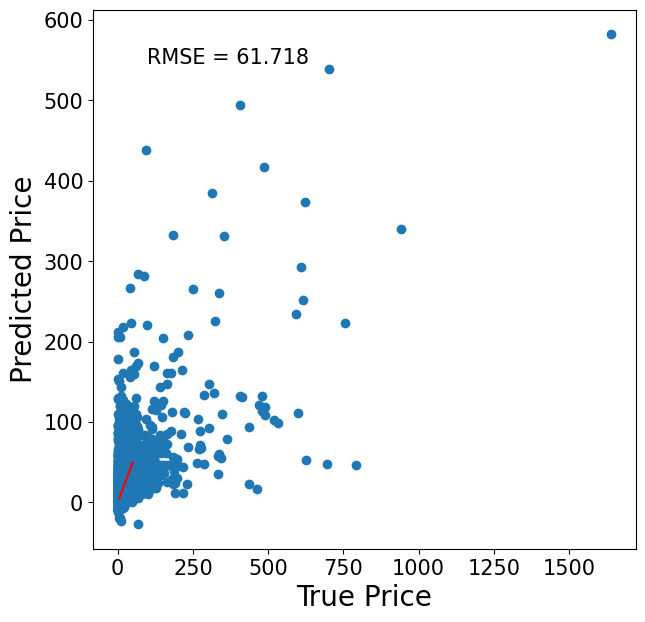

In [126]:
gbm = lgb.train(params, lgb_train)
# テストデータを用いて予測精度を確認する
test_predicted = gbm.predict(x_test)
predicted_df = pd.concat([y_test.reset_index(drop=True), pd.Series(test_predicted)], axis = 1)
predicted_df.columns = ['true', 'predicted']
# 予測値を図で確認する関数の定義
def Prediction_accuracy(predicted_df):
    RMSE = np.sqrt(mean_squared_error(predicted_df['true'], predicted_df['predicted']))
    plt.figure(figsize = (7,7))
    ax = plt.subplot(111)
    ax.scatter('true', 'predicted', data = predicted_df)
    ax.set_xlabel('True Price', fontsize = 20)
    ax.set_ylabel('Predicted Price', fontsize = 20)
    plt.tick_params(labelsize = 15)
    x = np.linspace(5, 50)
    y = x
    ax.plot(x, y, 'r-')
    plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE,3))),transform = ax.transAxes, fontsize = 15)
# 予測値を図で確認する
Prediction_accuracy(predicted_df)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

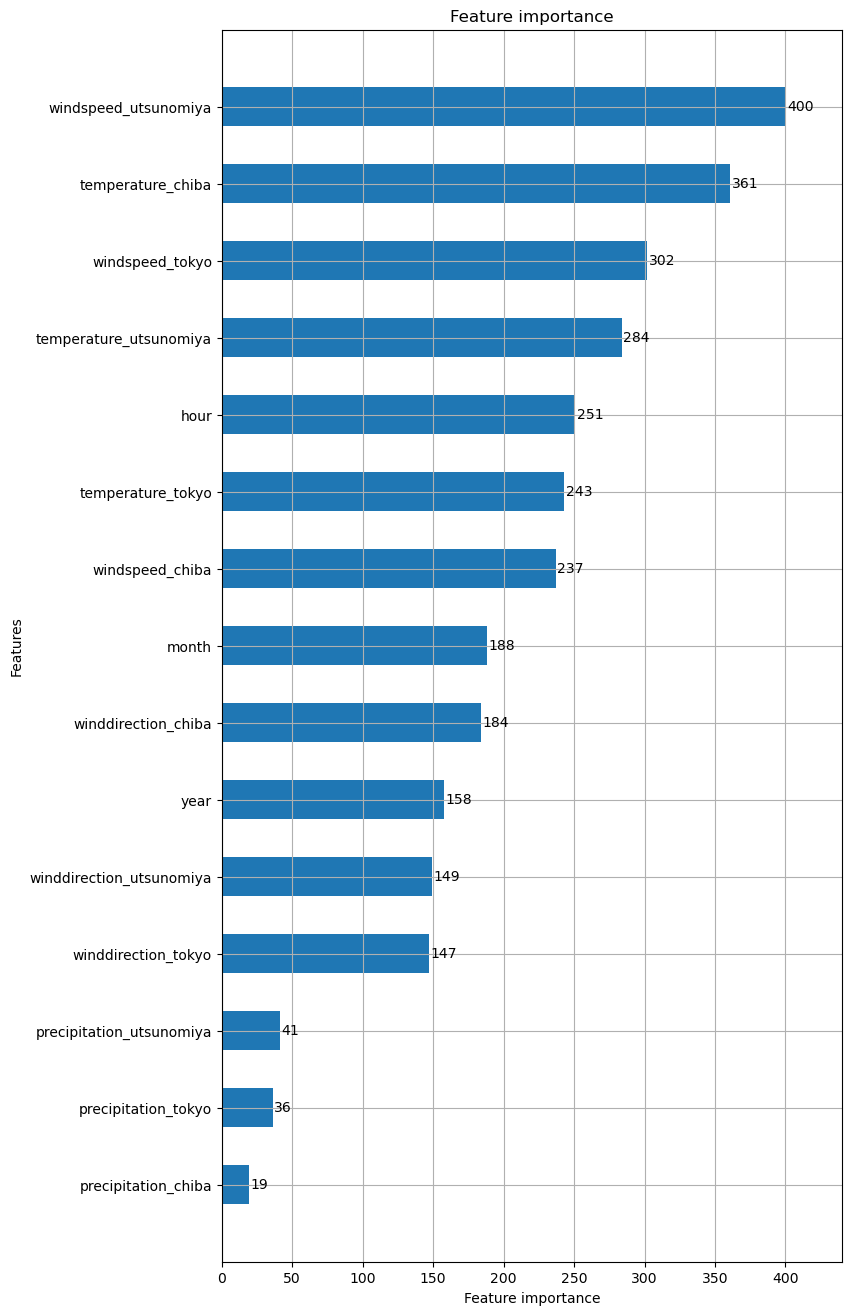

In [127]:
lgb.plot_importance(gbm, height = 0.5, figsize = (8,16))

In [160]:
test_tokyo = test_df.copy()
del test_tokyo["pollen_chiba"]
del test_tokyo["pollen_utsunomiya"]
del test_tokyo["pollen_tokyo"]
del test_tokyo["datetime"]

In [162]:
submission_df["pollen_tokyo"] = gbm.predict(test_tokyo)

In [163]:
#千葉
x_train = train_set.drop('pollen_tokyo', axis = 1)
x_train = x_train.drop('pollen_chiba', axis = 1)
x_train = x_train.drop('pollen_utsunomiya', axis = 1)

y_train = train_set['pollen_chiba']

x_test = test_set.drop('pollen_tokyo', axis = 1)
x_test = x_test.drop('pollen_chiba', axis = 1)
x_test = x_test.drop('pollen_utsunomiya', axis = 1)
y_test = test_set['pollen_chiba']

lgb_train = lgb.Dataset(x_train, y_train)
lgb.test = lgb.Dataset(x_test, y_test)

params = {'metric' : 'mae'}

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1254
[LightGBM] [Info] Number of data points in the train set: 9729, number of used features: 15
[LightGBM] [Info] Start training from score 28.841608


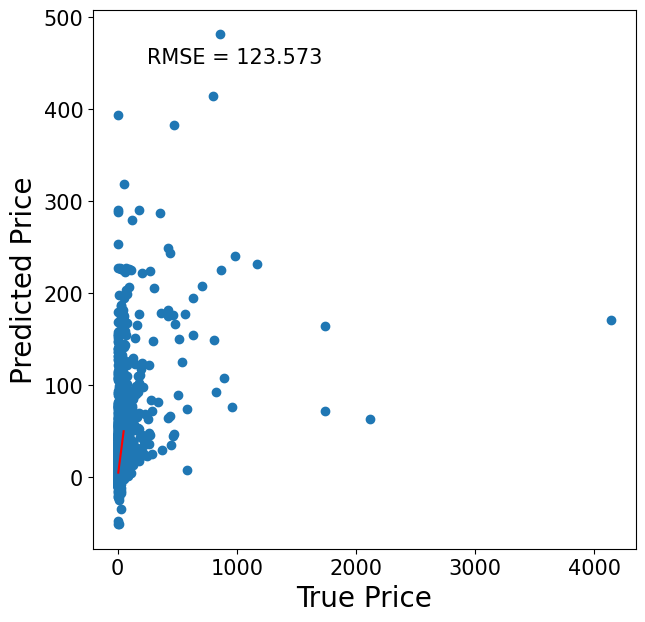

In [164]:
gbm = lgb.train(params, lgb_train)
# テストデータを用いて予測精度を確認する
test_predicted = gbm.predict(x_test)
predicted_df = pd.concat([y_test.reset_index(drop=True), pd.Series(test_predicted)], axis = 1)
predicted_df.columns = ['true', 'predicted']
# 予測値を図で確認する関数の定義
def Prediction_accuracy(predicted_df):
    RMSE = np.sqrt(mean_squared_error(predicted_df['true'], predicted_df['predicted']))
    plt.figure(figsize = (7,7))
    ax = plt.subplot(111)
    ax.scatter('true', 'predicted', data = predicted_df)
    ax.set_xlabel('True Price', fontsize = 20)
    ax.set_ylabel('Predicted Price', fontsize = 20)
    plt.tick_params(labelsize = 15)
    x = np.linspace(5, 50)
    y = x
    ax.plot(x, y, 'r-')
    plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE,3))),transform = ax.transAxes, fontsize = 15)
# 予測値を図で確認する
Prediction_accuracy(predicted_df)

In [165]:
test_chiba = test_df.copy()
del test_chiba["pollen_chiba"]
del test_chiba["pollen_utsunomiya"]
del test_chiba["pollen_tokyo"]
del test_chiba["datetime"]

submission_df["pollen_chiba"] = gbm.predict(test_chiba)

In [166]:
#宇都宮
x_train = train_set.drop('pollen_tokyo', axis = 1)
x_train = x_train.drop('pollen_chiba', axis = 1)
x_train = x_train.drop('pollen_utsunomiya', axis = 1)

y_train = train_set['pollen_utsunomiya']

x_test = test_set.drop('pollen_tokyo', axis = 1)
x_test = x_test.drop('pollen_chiba', axis = 1)
x_test = x_test.drop('pollen_utsunomiya', axis = 1)
y_test = test_set['pollen_utsunomiya']

lgb_train = lgb.Dataset(x_train, y_train)
lgb.test = lgb.Dataset(x_test, y_test)

params = {'metric' : 'mae'}

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000742 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1254
[LightGBM] [Info] Number of data points in the train set: 9729, number of used features: 15
[LightGBM] [Info] Start training from score 87.228389


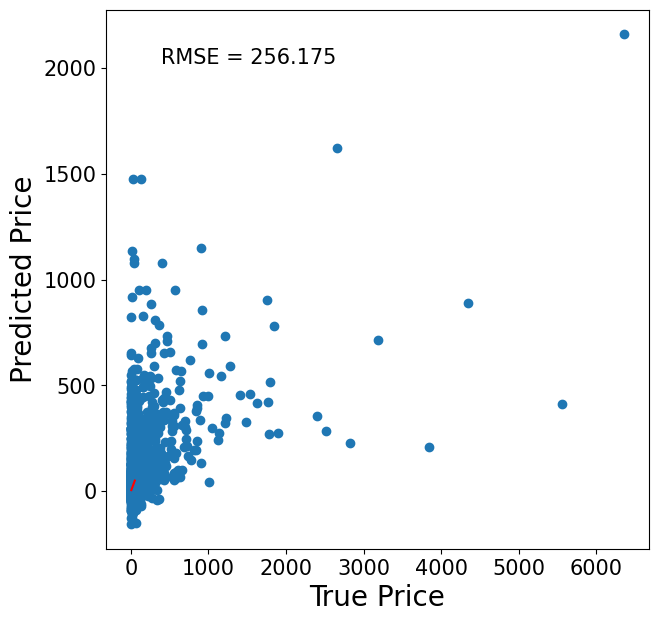

In [167]:
gbm = lgb.train(params, lgb_train)
# テストデータを用いて予測精度を確認する
test_predicted = gbm.predict(x_test)
predicted_df = pd.concat([y_test.reset_index(drop=True), pd.Series(test_predicted)], axis = 1)
predicted_df.columns = ['true', 'predicted']
# 予測値を図で確認する関数の定義
def Prediction_accuracy(predicted_df):
    RMSE = np.sqrt(mean_squared_error(predicted_df['true'], predicted_df['predicted']))
    plt.figure(figsize = (7,7))
    ax = plt.subplot(111)
    ax.scatter('true', 'predicted', data = predicted_df)
    ax.set_xlabel('True Price', fontsize = 20)
    ax.set_ylabel('Predicted Price', fontsize = 20)
    plt.tick_params(labelsize = 15)
    x = np.linspace(5, 50)
    y = x
    ax.plot(x, y, 'r-')
    plt.text(0.1, 0.9, 'RMSE = {}'.format(str(round(RMSE,3))),transform = ax.transAxes, fontsize = 15)
# 予測値を図で確認する
Prediction_accuracy(predicted_df)

In [170]:
test_utsunomiya = test_df.copy()
del test_utsunomiya["pollen_chiba"]
del test_utsunomiya["pollen_utsunomiya"]
del test_utsunomiya["pollen_tokyo"]
del test_utsunomiya["datetime"]

submission_df["pollen_utsunomiya"] = gbm.predict(test_chiba)

In [171]:
submission_df

,datetime,pollen_utsunomiya,pollen_chiba,pollen_tokyo
0,2020040101,133.089477,11.099699,8.108405
1,2020040102,81.508918,10.934696,7.053268
2,2020040103,351.766047,12.617879,7.642586
3,2020040104,18.920916,11.476082,12.770423
4,2020040105,70.279403,13.963789,10.125820
...,...,...,...,...
331,2020041420,134.501724,24.841302,15.650704
332,2020041421,4.655116,16.084213,5.655489
333,2020041422,107.241424,11.503082,24.018447
334,2020041423,21.969358,14.573822,7.186078


In [172]:
submission_df.to_csv("output/01.lightGBM.csv", index = False)